개발 환경 : Google Colaboratory

## 사용할 패키지 불러오기

In [ ]:
pip install pandasql # version : 0.7.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yellowbrick # version : 1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- 한글 폰트 다운 (다운 완료시 런타임 재시작 수행해주세요!)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt # version : 3.2.2
import matplotlib.cm as cm # version : 3.2.2
from matplotlib import rc # version : 3.2.2
import pandas as pd # version : 1.3.5
from pandasql import sqldf 
import seaborn as sns # version :0.11.2
from tqdm import tqdm # version : 4.64.1
import numpy as np # version :1.21.6
from yellowbrick.cluster import SilhouetteVisualizer 
import math # version : 1.2.1
import zipfile 
import warnings
warnings.filterwarnings('ignore')
rc('font', family='NanumBarunGothic')
from sklearn.cluster import KMeans # version : 1.0.2
from sklearn.preprocessing import StandardScaler # version : 1.0.2
from sklearn.datasets import make_blobs # version : 1.0.2
from sklearn.metrics import silhouette_samples, silhouette_score # version : 1.0.2
from sklearn.decomposition import PCA # version : 1.0.2

## 데이터 다운로드 & 불러오기

In [ ]:
!gdown --id 1Qwz-dFgLNcC9zEXY3mqHoLVr73qOgTTv
zf = zipfile.ZipFile("경진대회 예선 데이터.zip")
zf.setpassword(b"nh1212!")
zf.extractall()

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Qwz-dFgLNcC9zEXY3mqHoLVr73qOgTTv
To: /content/경진대회 예선 데이터.zip
100% 12.5M/12.5M [00:00<00:00, 192MB/s]


In [ ]:
info_data = pd.read_csv('./cus_ifo.csv')
kr_data = pd.read_csv('./kr_stk_orr.csv')
oss_data = pd.read_csv('./oss_stk_orr.csv')
cus_tot_data = pd.read_csv('./cus_tot_aet_ifo.csv')

In [ ]:
kr_data

,act_no,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd
0,baee84002daf5d4428067edb7507c83d1411a1bbe013af...,20220427,1,14,14,A006800,2,85.0,7890.0,3
1,baee84002daf5d4428067edb7507c83d1411a1bbe013af...,20220304,1,12,12,A271940,2,10.0,39600.0,3
2,baee84002daf5d4428067edb7507c83d1411a1bbe013af...,20220207,1,10,10,A100790,1,100.0,9100.0,3
3,4d95fb22c2608cd427867182a75c5db9ddfafe3476d56c...,20220511,2,10,10,A160980,2,1.0,17200.0,3
4,4d95fb22c2608cd427867182a75c5db9ddfafe3476d56c...,20220511,1,10,10,A160980,2,1.0,17250.0,3
...,...,...,...,...,...,...,...,...,...,...
503581,720d6550786a3470dcbf15cce60007803e7bc537a7acb0...,20220613,1,11,12,A106190,2,71.0,10250.0,3
503582,81fa8b64db4c2394a4272e0ef606d9d6a03e00deb59067...,20220617,1,9,9,A382900,1,2.0,43400.0,3
503583,81fa8b64db4c2394a4272e0ef606d9d6a03e00deb59067...,20220303,1,9,9,A146320,1,1.0,28400.0,3
503584,2ed7ab643ba95996e357df240fb8da3c333796b11dc116...,20220303,1,9,9,A146320,1,1.0,28600.0,3


In [ ]:
oss_data

,act_no,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,89ec90b53373d769cd2e9554330d3966d6c9aa6d8db503...,20220401,2,1,1,US5494981039,2,9.0,24.5100,3,USD,1210.7
1,89ec90b53373d769cd2e9554330d3966d6c9aa6d8db503...,20220401,1,1,1,US5494981039,2,2.0,24.4600,3,USD,1210.7
2,89ec90b53373d769cd2e9554330d3966d6c9aa6d8db503...,20220503,1,22,22,US5494981039,1,11.0,19.0600,3,USD,1265.8
3,89ec90b53373d769cd2e9554330d3966d6c9aa6d8db503...,20220324,1,22,22,US5494981039,1,1.0,26.0312,3,USD,1212.7
4,89ec90b53373d769cd2e9554330d3966d6c9aa6d8db503...,20220303,1,23,23,US5494981039,2,1.0,24.2100,3,USD,1205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51897,2594440b84af67cd84da0d94cc2ce3df5aa2fbd6e3da2a...,20220125,1,23,23,US78462F1030,2,1.0,433.1900,3,USD,1194.2
51898,69d7b16fd50aae006cb2cb6665917390d6ff48a6bff8ce...,20220104,1,0,0,US67066G1040,2,9.0,291.9400,3,USD,1190.8
51899,599d7c82616ef145765af93b7984e70f54b4ac502e59fc...,20220113,1,4,4,US5949181045,2,2.0,310.3900,3,USD,1189.9
51900,512f34d7002f0d041ea80ce2109151f72892f4a57a826d...,20220328,1,23,23,US67066G1040,1,6.0,276.1900,3,USD,1218.3


In [ ]:
# 칼럼 정보 확인
info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59081 entries, 0 to 59080
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cus_no                 59081 non-null  object 
 1   act_no                 59081 non-null  object 
 2   bse_ym                 59081 non-null  int64  
 3   mts_mm_access_type     59081 non-null  int64  
 4   sex_dit_cd             59081 non-null  int64  
 5   cus_age_stn_cd         59081 non-null  int64  
 6   cus_aet_stn_cd         59081 non-null  int64  
 7   pft_amt_stn_cd         59081 non-null  int64  
 8   fst_act_opn_dt         59081 non-null  int64  
 9   stk_pdt_hld_yn         59081 non-null  object 
 10  ose_stk_pdt_hld_yn     59081 non-null  object 
 11  mrz_pdt_tp_sgm_cd      59081 non-null  int64  
 12  lsg_sgm_cd             59081 non-null  int64  
 13  tco_cus_grd_cd         59081 non-null  int64  
 14  tot_ivs_te_sgm_cd      59081 non-null  int64  
 15  hl

## 전처리

### 거래횟수 가져오기

In [ ]:
ko_data = sqldf('select a.cus_no as "고객번호", a.act_no as "계좌번호", count(a.act_no) as "국내 주식 거래횟수" from info_data as a join kr_data as b on a.act_no = b.act_no group by a.act_no')
os_data = sqldf('select a.cus_no as "고객번호", a.act_no as "계좌번호", count(a.act_no) as "해외 주식 거래횟수" from info_data as a join oss_data as b on a.act_no = b.act_no group by a.act_no')

### 국내 주식만 투자하는 고객, 해외 거래만 투자하는 고객, 둘다 투자하는 고객 나누기

In [ ]:
ko_real = sqldf('select a.act_no as "계좌번호", count(a.act_no) as "국내 주식 거래횟수" from kr_data as a group by a.act_no')
os_real = sqldf('select a.act_no as "계좌번호", count(a.act_no) as "해외 주식 거래횟수" from oss_data as a group by a.act_no')

# 국내 주식만 하는 고객
only_ko = list(set(list(ko_real['계좌번호'])) - set(list(os_real['계좌번호'])))
only_ko_df = ko_real.loc[ko_real['계좌번호'].isin(only_ko)]

# 해외 주식만 하는 고객
only_os = list(set(list(os_real['계좌번호'])) - set(list(ko_real['계좌번호'])))
only_os_df = os_real.loc[os_real['계좌번호'].isin(only_os)]

# 둘다 같이 하는 고객
all_of = list(set(list(os_real['계좌번호'])) & set(list(ko_real['계좌번호'])))
all_of_df1 = ko_real.loc[ko_real['계좌번호'].isin(all_of)]
all_of_df2 = os_real.loc[os_real['계좌번호'].isin(all_of)]

all_of_df = pd.merge(all_of_df1, all_of_df2 ,how='outer',on='계좌번호')

# info 데이터에서 국내, 해외, 둘다 하는 각 고객의 정보 가져오기
ko = info_data.loc[info_data['act_no'].isin(only_ko_df['계좌번호'])]
os = info_data.loc[info_data['act_no'].isin(only_os_df['계좌번호'])]
ko_os = info_data.loc[info_data['act_no'].isin(all_of_df['계좌번호'])]

### 각각의 DataFrame 에서 6개월간 변하지 않는 값 + 실제 사용할 열 추가

- 데이터가 1월~6월까지 변동이 있는 열도 존재하고 변동이 없는 열도 존재
- 변동이 없는 열은 그대로 사용하고 변동이 있는 열은 가장 최근에 데이터를 가져옴

In [ ]:
def info_get_col(info_df, only_df):

    sum_df = pd.DataFrame()

    for i in tqdm(only_df['계좌번호']):
        sep = info_df.loc[info_df['act_no'].isin([i])]
        real_col_list = []

        for col in sep.columns:  # 6개월간 변동이 없는 열 그대로 선택
            if len(sep[col].unique()) == 1:
                real_col_list.append(col)

        # 6개월 안에 변동이 생기는 열 중에서 사용할 열을 가장 최근의 데이터로 가져옴
        real_col = list(set(real_col_list + ['cus_age_stn_cd', 'cus_aet_stn_cd', 'pft_amt_stn_cd', 'loy_sgm_cd', 'lsg_sgm_cd', 'mrz_pdt_tp_sgm_cd', 'tco_cus_grd_cd', 'tot_ivs_te_sgm_cd', 'mrz_mkt_dit_cd', 'mrz_btp_dit_cd', 'aet_bse_stk_trd_tp_cd']))
        new_sep = sep.loc[sep['bse_ym'] == sep['bse_ym'].max(), real_col].copy()

        sum_df = pd.concat([sum_df,new_sep], axis=0)
        sum_df.reset_index(inplace=True, drop=True)

    return sum_df

In [ ]:
pre_ko_df = info_get_col(ko, only_ko_df)
pre_os_df = info_get_col(os, only_os_df)
pre_ko_os_df = info_get_col(ko_os, all_of_df)

100%|██████████| 670/670 [00:05<00:00, 133.11it/s]


- 최소의 열을 가진 고객군을 기준으로 다른 고객군 열 맞추기

In [ ]:
print('국내 주식 고객군 : ',len(pre_ko_df.columns))
print('해외 주식 고객군 : ',len(pre_os_df.columns)) # 기준
print('국내 + 해외 주식 고객군 : ',len(pre_ko_os_df.columns))


pre_ko_df = pre_ko_df[pre_os_df.columns]
pre_ko_os_df = pre_ko_os_df[pre_os_df.columns]

국내 주식 고객군 :  21
해외 주식 고객군 :  20
국내 + 해외 주식 고객군 :  21


### 변동률 계산

- 고객의 계좌에 자산은 1월~6월까지 변동이 있는 데이터입니다.
- 변동되는 데이터를 사용하기보다는 1~6월까지의 자산을 대표하는 변수를 생성하기 위해 변동률을 계산합니다.
- 실제 데이터에서는 1월이 NAN 이거나 2월까지 NAN인 항목이 존재 첫 자산이 등록된 것을 기준으로 첫 자산 대비 마지막 자산의 변동률을 계산했습니다.
- 첫 값과 끝값이 모두 0이면 0으로

**공식**
- t : 계좌에 첫 자산
- end : 6월 계좌 자산

- $ \frac{end-t}{t} * 100 $


- 고객 자산정보 가져오기

In [ ]:
asset_ko = sqldf('select distinct * from pre_ko_df as a left join cus_tot_data as b on a.cus_no = b.cus_no AND a.act_no = b.act_no')
asset_ko = asset_ko.loc[:, ~asset_ko.T.duplicated()]

asset_os_df = sqldf('select distinct * from pre_os_df as a left join cus_tot_data as b on a.cus_no = b.cus_no AND a.act_no = b.act_no')
asset_os_df = asset_os_df.loc[:, ~asset_os_df.T.duplicated()]

asset_ko_os_df = sqldf('select distinct * from pre_ko_os_df as a left join cus_tot_data as b on a.cus_no = b.cus_no AND a.act_no = b.act_no')
asset_ko_os_df = asset_ko_os_df.loc[:, ~asset_ko_os_df.T.duplicated()]

- 변동률 계산

In [ ]:
def make_rate(df):
    rate = []
    last_name = 'tot_aet_tld_rnd_202206'
    aet_name = 'tot_aet_tld_rnd_20220'

    for i in tqdm(range(len(df))):
        d = 1
        while True:
            if np.isnan(df[aet_name + str(d)][i]) == True:
                d+=1
            else:
                rate.append((df[last_name][i] - df[aet_name + str(d)][i]) / df[aet_name + str(d)][i] * 100)
                break

    return [0 if math.isnan(x) else x for x in rate]


asset_ko['변동률'] = make_rate(asset_ko)
asset_os_df['변동률'] = make_rate(asset_os_df)
asset_ko_os_df['변동률'] = make_rate(asset_ko_os_df)

100%|██████████| 670/670 [00:00<00:00, 25510.25it/s]


### 열이름 변경, 거래횟수 데이터 추가

In [ ]:
asset_ko = asset_ko.rename(columns={'cus_no' :'고객번호',
                          'tco_cus_grd_cd' : '고객등급코드',
                          'fst_act_opn_dt' : '최초계좌개설일',
                          'act_no' : '계좌번호',
                          'hld_pdt_tp_sgm_cd' : '보유상품유형세그먼트코드',
                          'tot_ivs_te_sgm_cd' : '총투자기간세그먼트코드',
                          'mrz_pdt_tp_sgm_cd' : '주거래상품군',
                          'cus_aet_stn_cd' : '고객자산구간코드',
                          'lsg_sgm_cd' : 'LIFESTAGE세그먼트코드',
                          'sex_dit_cd' : '성별',
                          'aet_bse_stk_trd_tp_cd' : '자산기준주식거래유형코드',
                          'mrz_btp_dit_cd' : '주거래업종구분코드',
                          'mrz_mkt_dit_cd' : '주거래시장구분코드',
                          'cus_age_stn_cd': '연령대',
                          'pft_amt_stn_cd' : '수익금액구간코드',
                          'loy_sgm_cd' : '충성도세그먼트코드',
                          'mts_mm_access_type' : 'MTS월단위접속패턴',
                          'tot_aet_tld_rnd_202201' : '2022년1월총자산',
                          'tot_aet_tld_rnd_202202' : '2022년2월총자산',
                          'tot_aet_tld_rnd_202203' : '2022년3월총자산',
                          'tot_aet_tld_rnd_202204' : '2022년4월총자산',
                          'tot_aet_tld_rnd_202205' : '2022년5월총자산',
                          'tot_aet_tld_rnd_202206' : '2022년6월총자산'
                          })

asset_os_df = asset_os_df.rename(columns={'cus_no' :'고객번호',
                          'tco_cus_grd_cd' : '고객등급코드',
                          'fst_act_opn_dt' : '최초계좌개설일',
                          'act_no' : '계좌번호',
                          'hld_pdt_tp_sgm_cd' : '보유상품유형세그먼트코드',
                          'tot_ivs_te_sgm_cd' : '총투자기간세그먼트코드',
                          'mrz_pdt_tp_sgm_cd' : '주거래상품군',
                          'cus_aet_stn_cd' : '고객자산구간코드',
                          'lsg_sgm_cd' : 'LIFESTAGE세그먼트코드',
                          'sex_dit_cd' : '성별',
                          'aet_bse_stk_trd_tp_cd' : '자산기준주식거래유형코드',
                          'mrz_btp_dit_cd' : '주거래업종구분코드',
                          'mrz_mkt_dit_cd' : '주거래시장구분코드',
                          'cus_age_stn_cd': '연령대',
                          'pft_amt_stn_cd' : '수익금액구간코드',
                          'loy_sgm_cd' : '충성도세그먼트코드',
                          'mts_mm_access_type' : 'MTS월단위접속패턴',
                          'tot_aet_tld_rnd_202201' : '2022년1월총자산',
                          'tot_aet_tld_rnd_202202' : '2022년2월총자산',
                          'tot_aet_tld_rnd_202203' : '2022년3월총자산',
                          'tot_aet_tld_rnd_202204' : '2022년4월총자산',
                          'tot_aet_tld_rnd_202205' : '2022년5월총자산',
                          'tot_aet_tld_rnd_202206' : '2022년6월총자산'
                          })

asset_ko_os_df = asset_ko_os_df.rename(columns={'cus_no' :'고객번호',
                          'tco_cus_grd_cd' : '고객등급코드',
                          'fst_act_opn_dt' : '최초계좌개설일',
                          'act_no' : '계좌번호',
                          'hld_pdt_tp_sgm_cd' : '보유상품유형세그먼트코드',
                          'tot_ivs_te_sgm_cd' : '총투자기간세그먼트코드',
                          'mrz_pdt_tp_sgm_cd' : '주거래상품군',
                          'cus_aet_stn_cd' : '고객자산구간코드',
                          'lsg_sgm_cd' : 'LIFESTAGE세그먼트코드',
                          'sex_dit_cd' : '성별',
                          'aet_bse_stk_trd_tp_cd' : '자산기준주식거래유형코드',
                          'mrz_btp_dit_cd' : '주거래업종구분코드',
                          'mrz_mkt_dit_cd' : '주거래시장구분코드',
                          'cus_age_stn_cd': '연령대',
                          'pft_amt_stn_cd' : '수익금액구간코드',
                          'loy_sgm_cd' : '충성도세그먼트코드',
                          'mts_mm_access_type' : 'MTS월단위접속패턴',
                          'tot_aet_tld_rnd_202201' : '2022년1월총자산',
                          'tot_aet_tld_rnd_202202' : '2022년2월총자산',
                          'tot_aet_tld_rnd_202203' : '2022년3월총자산',
                          'tot_aet_tld_rnd_202204' : '2022년4월총자산',
                          'tot_aet_tld_rnd_202205' : '2022년5월총자산',
                          'tot_aet_tld_rnd_202206' : '2022년6월총자산'
                          })

set_ko = pd.merge(asset_ko, only_ko_df, how='left',on='계좌번호')
set_os = pd.merge(asset_os_df, only_os_df, how='left',on='계좌번호')
set_ko_os = pd.merge(asset_ko_os_df, all_of_df, how='left',on='계좌번호')

In [ ]:
set_ko_os['총거래 횟수'] = set_ko_os['국내 주식 거래횟수'] + set_ko_os['해외 주식 거래횟수']
set_ko_os = set_ko_os.drop(['국내 주식 거래횟수', '해외 주식 거래횟수'], axis=1)

### 총 거래 횟수 칼럼 추가

In [ ]:
all = pd.concat([set_ko,set_os,set_ko_os]).reset_index()
all = all.fillna(0)
all['총거래 횟수'] = all['총거래 횟수']+all['국내 주식 거래횟수']+all['해외 주식 거래횟수']
all

,index,최초계좌개설일,stk_pdt_hld_yn,MTS월단위접속패턴,주거래업종구분코드,성별,주거래시장구분코드,고객자산구간코드,충성도세그먼트코드,계좌번호,...,2022년1월총자산,2022년2월총자산,2022년3월총자산,2022년4월총자산,2022년5월총자산,2022년6월총자산,변동률,국내 주식 거래횟수,해외 주식 거래횟수,총거래 횟수
0,0,20201201,Y,1001,10.0,1,2.0,2,4.0,0000b53f15d9484a62a745bdb02cd5f27796ba07c1bddc...,...,12838237.0,12723863.0,12448513.0,12414235.0,12428927.0,14335449.0,11.662131,2.0,0.0,2.0
1,1,20200825,Y,111111,10.0,1,2.0,1,4.0,00086aa946369d1c75182dffd43bd4a34f3abc1ddeba03...,...,2177307.0,24591478.0,10643554.0,7030283.0,7027915.0,6744912.0,209.782314,685.0,0.0,685.0
2,2,20201227,Y,111111,9.0,2,1.0,4,4.0,003b998c70775d3f079d89ed932345ef3276d2a35d93a5...,...,99958023.0,99206212.0,103832787.0,101964302.0,101474455.0,97806007.0,-2.152920,47.0,0.0,47.0
3,3,20200924,Y,111111,9.0,1,5.0,1,5.0,0041e009e19878cd52dca944d43ab4a0492ea981425bc6...,...,6224121.0,6583157.0,7032789.0,6655856.0,6790856.0,6638010.0,6.649758,19.0,0.0,19.0
4,4,20210224,0,111111,12.0,2,1.0,1,4.0,006112ef04dbdc2a5e19a85e0d9a5e8b31a4ecf37b4244...,...,3402215.0,4704502.0,5107587.0,8612058.0,2958760.0,3241459.0,-4.725039,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6962,665,20211114,Y,111111,16.0,2,6.0,1,5.0,fdaa90e8ebfbff173a9675248c222e85a8ebc84c79ae12...,...,593311.0,776944.0,1290775.0,1164162.0,1183485.0,959228.0,61.673726,0.0,0.0,9.0
6963,666,20200406,Y,111111,16.0,1,6.0,4,4.0,fe37598832877cce1ac57811788d85b9985207d30dcb50...,...,72055519.0,73213062.0,84102028.0,77053140.0,75033011.0,72256476.0,0.278892,0.0,0.0,18.0
6964,667,20171013,Y,111111,9.0,1,1.0,3,4.0,fec61e97b6076b294e89d19d52f81c7bc181e9c54e1b58...,...,20169912.0,21196008.0,24714227.0,29246987.0,29495869.0,30825066.0,52.826973,0.0,0.0,65.0
6965,668,20210421,Y,111110,16.0,1,6.0,1,5.0,fee446b55745eca0829b4773db0720983555f9d6e41866...,...,416566.0,15000.0,15000.0,32132.0,15000.0,15000.0,-96.399130,0.0,0.0,5.0


### 분석에 사용하지 않는 열 제거

In [ ]:
all.drop(['최초계좌개설일', 'MTS월단위접속패턴',
             '2022년1월총자산','2022년2월총자산', '2022년3월총자산', '2022년4월총자산', '2022년5월총자산', '2022년6월총자산', 'ose_stk_pdt_hld_yn', 'stk_pdt_hld_yn' , 'bas_stk_trd_tp_cd',
          '국내 주식 거래횟수','해외 주식 거래횟수'],axis=1, inplace=True)

### 데이터 이상치 처리

- 데이터 안에 inf, 99, nan 이상치로 판단

In [ ]:
def del_df(df):
    del_list = []
    for i in tqdm(df.columns):
        del_list += list(df[df[i].isin([99, np.inf, -np.inf , np.nan])].index)

    new_df = df.drop(del_list).copy()
    new_df.reset_index(drop=True,inplace=True)
    return new_df


all = del_df(all)

100%|██████████| 18/18 [00:00<00:00, 1088.61it/s]


### 필요없는 열 추가 제거

In [ ]:
all.drop(['고객번호', '고객등급코드', '계좌번호', '수익금액구간코드', '보유상품유형세그먼트코드', '자산기준주식거래유형코드'], axis=1, inplace=True)

## EDA

### 히트맵 생성

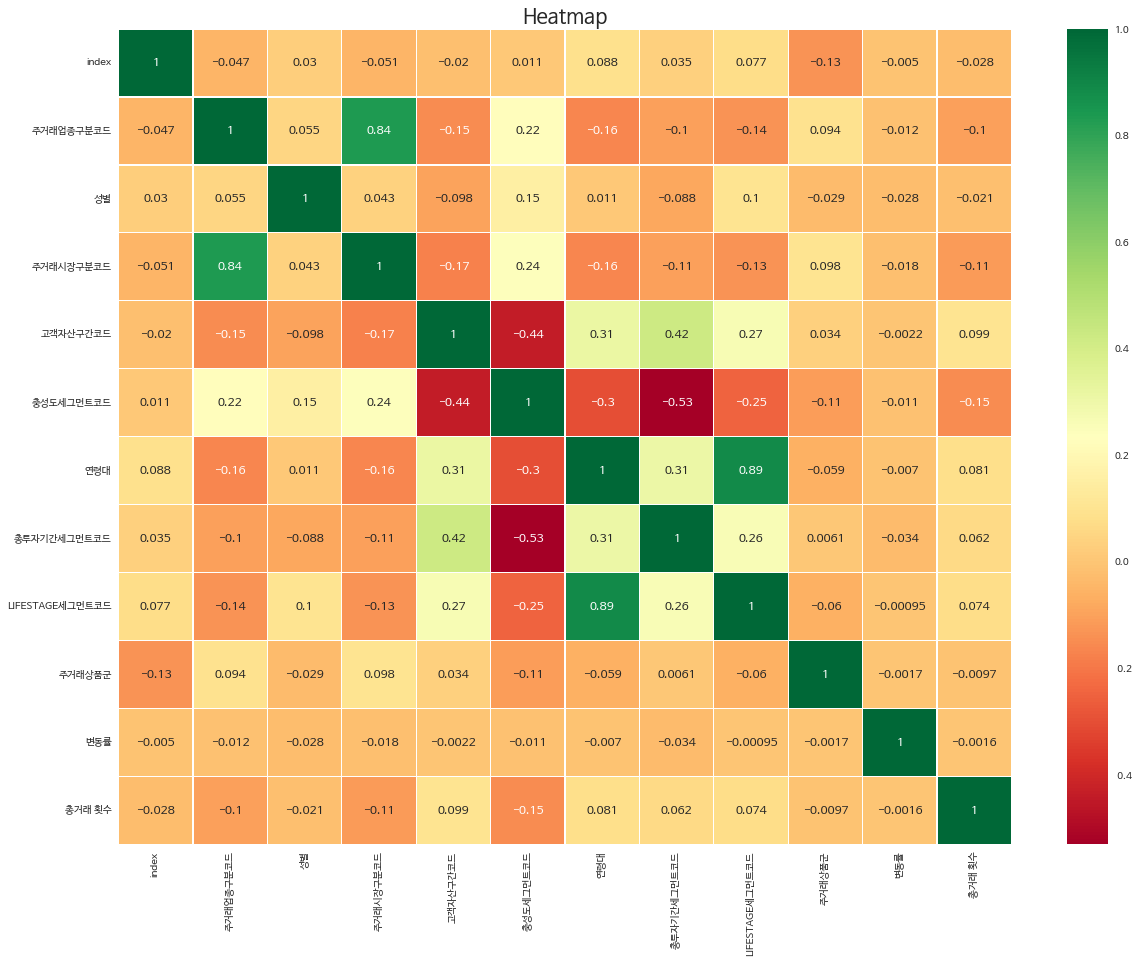

In [ ]:
ax = sns.heatmap(all.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.title('Heatmap', fontsize=20)
plt.show()

### 고객 테이블 주요 칼럼 EDA

In [ ]:
def pl(data):
  for i in data:
    x=[]
    y=[]
    for j in range(1,all[i].nunique()+1):
      x.append(j)
      y.append(sum(all[i]==j))
    plt.bar(x,y)
    plt.xlabel(i)
    plt.show()

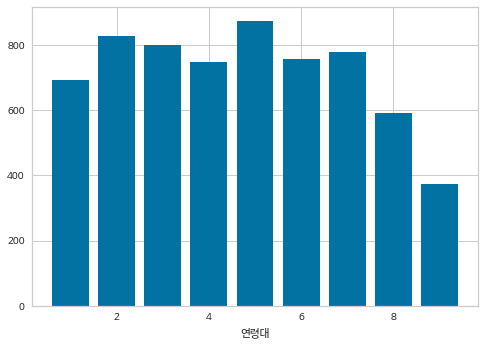

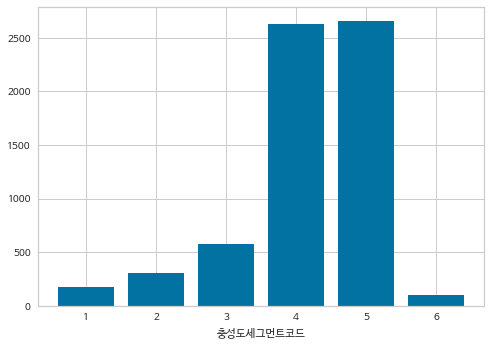

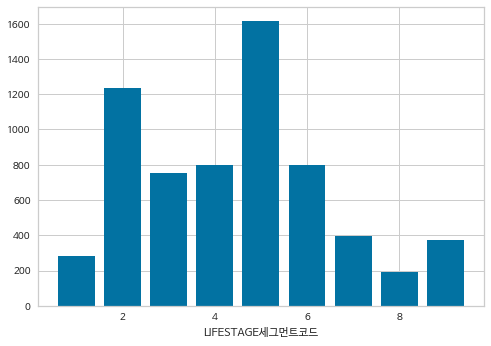

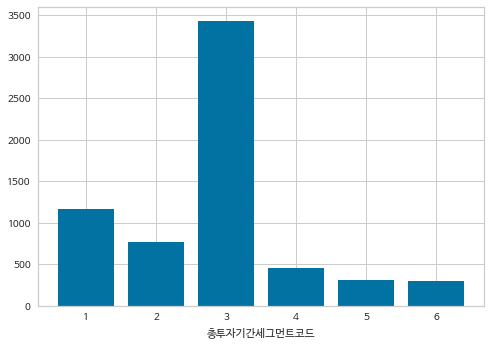

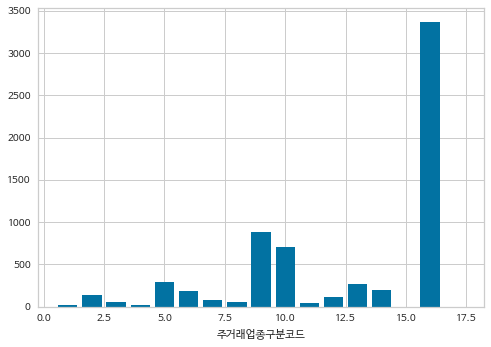

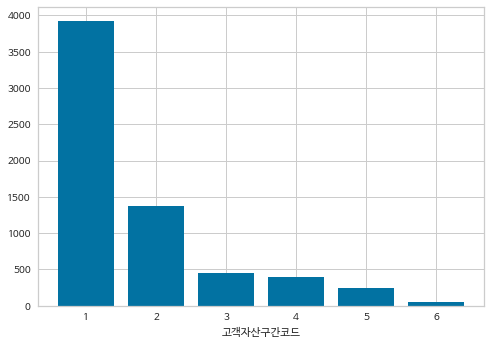

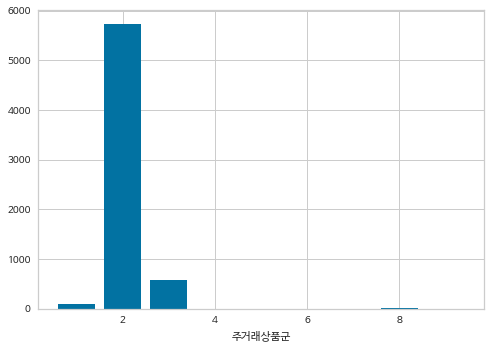

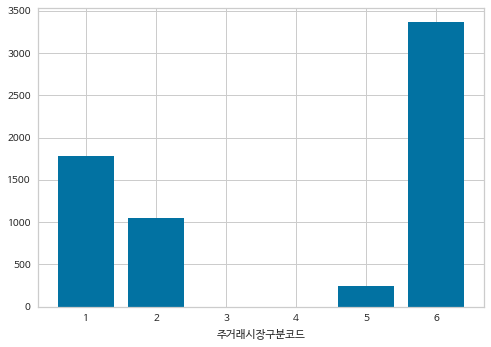

In [ ]:
pl(['연령대','충성도세그먼트코드','LIFESTAGE세그먼트코드','총투자기간세그먼트코드','주거래업종구분코드','고객자산구간코드','주거래상품군','주거래시장구분코드'])

- EDA결과, 총투자기간세그먼트코드에서‘1년 이상 3년 미만(3)'섹션을 기준으로 사용자 수에서 급격한 차이가 나타남을 발견했다. 따라서 총투자기간세그먼트코드를 1,2 / 3 / 4,5,6으로 나누어 분석하기로 한다.

## 군집화

### 투자기간에 따라 데이터 분할하기

In [ ]:
all_1=all[all['총투자기간세그먼트코드'].isin([1,2])]
all_2=all[all['총투자기간세그먼트코드'].isin([3])]
all_3=all[all['총투자기간세그먼트코드'].isin([4,5,6])]

### 정규화

In [ ]:
scaler = StandardScaler()
all_1_sc = scaler.fit_transform(all_1)
all_2_sc = scaler.fit_transform(all_2)
all_3_sc = scaler.fit_transform(all_3)

### 적절한 군집 수 찾기 및 군집별 실루엣 계수 평균

In [ ]:
def nclusters(data,k):
  x=np.arange(2,k+1)
  score=[]
  for i in range(2,k+1):
    km = KMeans(n_clusters=i, init='k-means++', random_state=119)
    km.fit(data)
    label=km.labels_
    a=silhouette_score(data, label, metric='euclidean')
    score.append(a)
  plt.plot(x,score)
  plt.title('군집 수 찾기')
  plt.show()

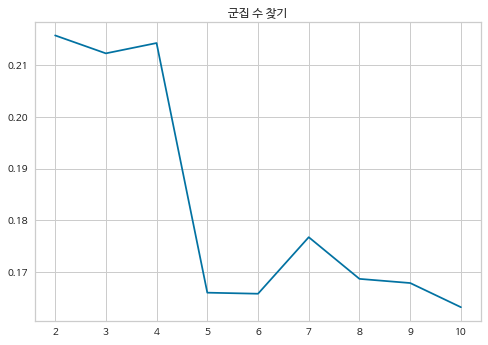

In [ ]:
nclusters(all_1_sc,10) # 2개

cluster
0    0.098949
1    0.290751
Name: coef, dtype: float64

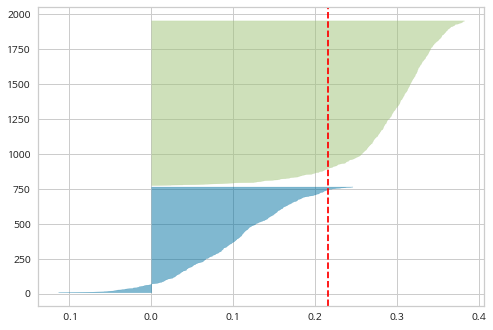

In [ ]:
km = KMeans(n_clusters=2, init='k-means++', random_state=119)
km=km.fit(all_1_sc)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(all_1_sc)

all_1['cluster'] = km.predict(all_1_sc)
all_1['coef']=visualizer.silhouette_samples_
all_1.groupby(['cluster']).mean()['coef']

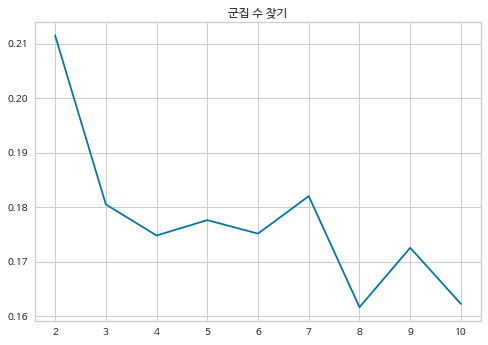

In [ ]:
nclusters(all_2_sc,10) # 2개

cluster
0    0.143304
1    0.273115
Name: coef, dtype: float64

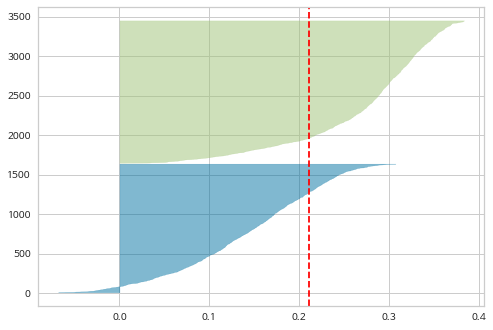

In [ ]:
km = KMeans(n_clusters=2, init='k-means++', random_state=119)
km=km.fit(all_2_sc)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(all_2_sc)

all_2['cluster'] = km.predict(all_2_sc)
all_2['coef']=visualizer.silhouette_samples_
all_2.groupby(['cluster']).mean()['coef']

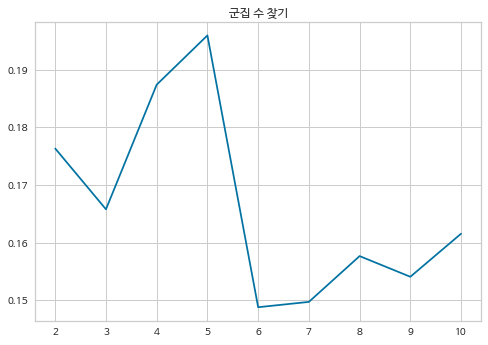

In [ ]:
nclusters(all_3_sc,10) # 아래 plot에서는 5개로 나왔지만 아래의 산점도 plot(visualize_kmeans_plot_multi)을 종합적으로 참고하여 2개로 결정하였다.

cluster
0    0.116492
1    0.246003
Name: coef, dtype: float64

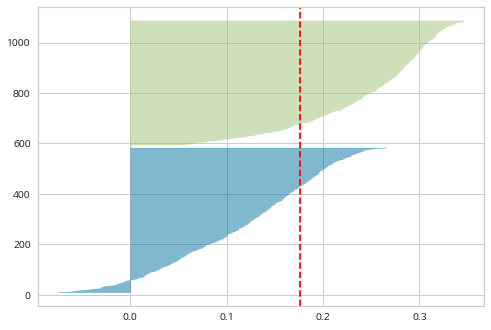

In [ ]:
km = KMeans(n_clusters=2, init='k-means++', random_state=119)
km=km.fit(all_3_sc)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(all_3_sc)

all_3['cluster'] = km.predict(all_3_sc)
all_3['coef']=visualizer.silhouette_samples_
all_3.groupby(['cluster']).mean()['coef']

### 군집별 실루엣 계수 및 평균값

In [ ]:
def plot_Silhouette(data, k, text):
    km = KMeans(n_clusters=k, init='k-means++', random_state=119)
    km.fit(data)

    fig = plt.figure()
    fig.set_size_inches(15, 5)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(data)

    visualizer.ax.set_title(text,fontsize=15, weight='bold')
    visualizer.ax.set_xlabel("Silhouette Value",fontsize=15, weight='bold')
    visualizer.ax.set_ylabel("군집",fontsize=15, weight='bold')
    visualizer.ax.set_yticks([])

    plt.show()

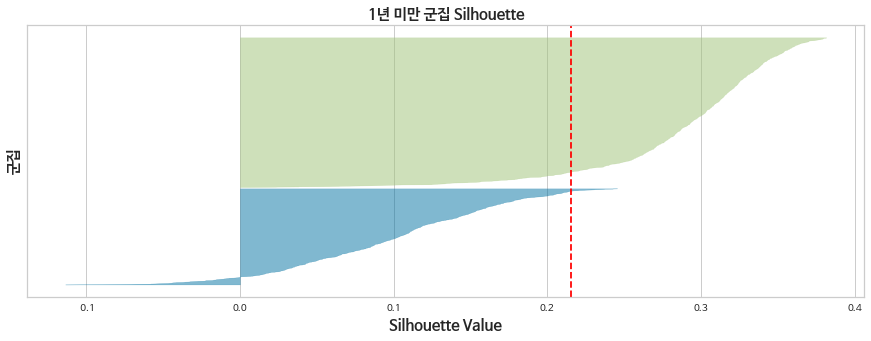

In [ ]:
plot_Silhouette(all_1_sc, 2, '1년 미만 군집 Silhouette')

### 군집 개수에 따른 군집 결과 시각화

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

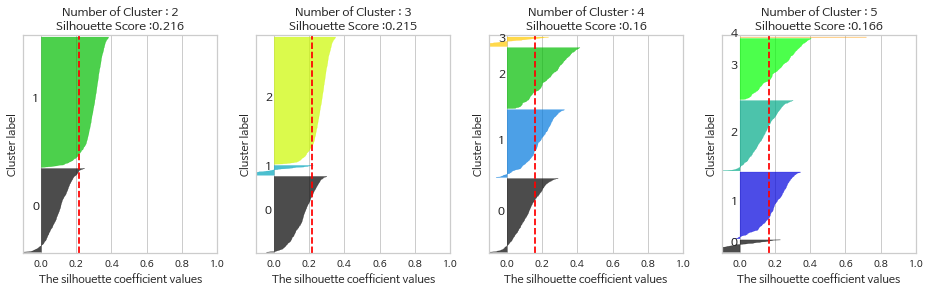

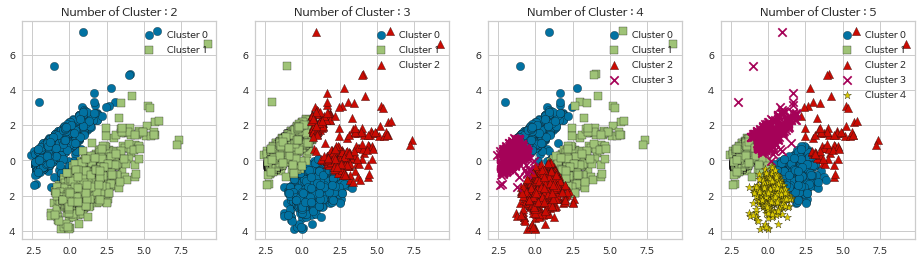

In [ ]:
visualize_silhouette([2,3,4,5],all_1_sc)
visualize_kmeans_plot_multi([2,3,4,5],all_1_sc)

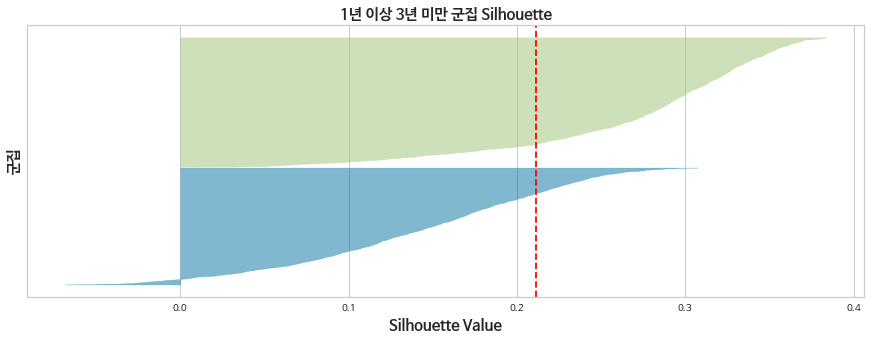

In [ ]:
plot_Silhouette(all_2_sc, 2, '1년 이상 3년 미만 군집 Silhouette')

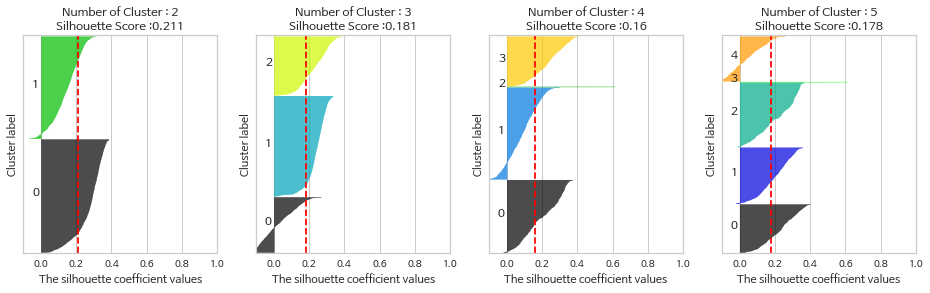

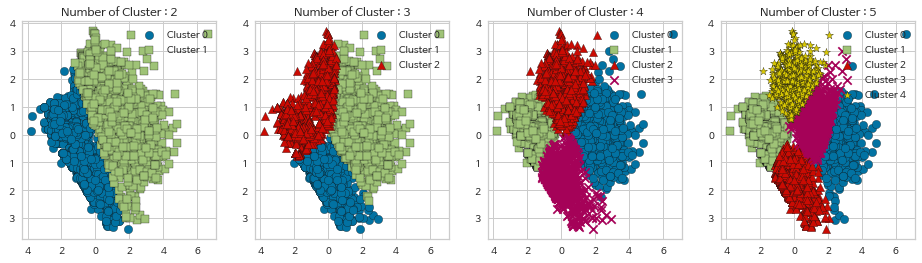

In [ ]:
visualize_silhouette([2,3,4,5],all_2_sc)
visualize_kmeans_plot_multi([2,3,4,5],all_2_sc)

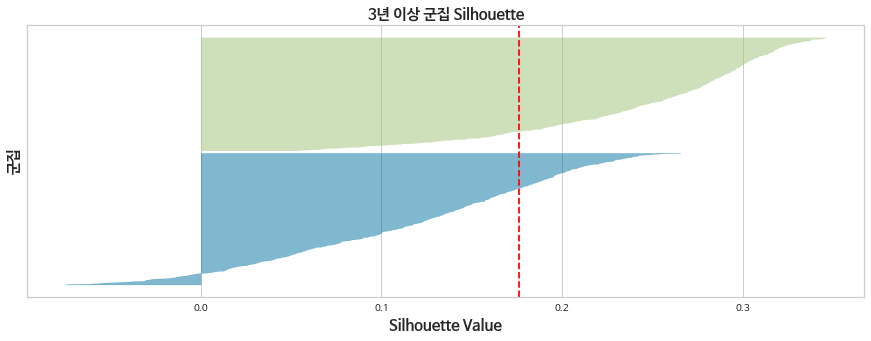

In [ ]:
plot_Silhouette(all_3_sc, 2, '3년 이상 군집 Silhouette')

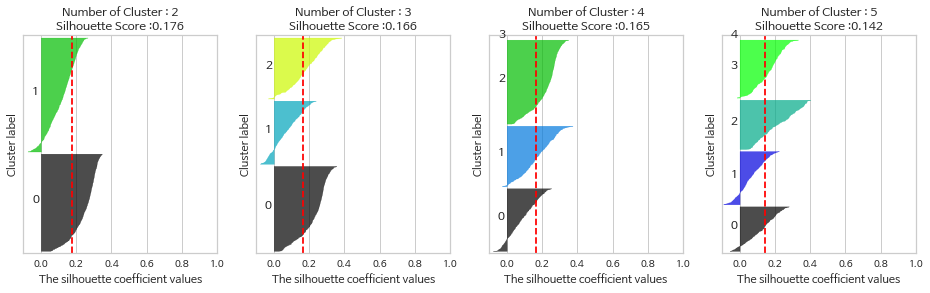

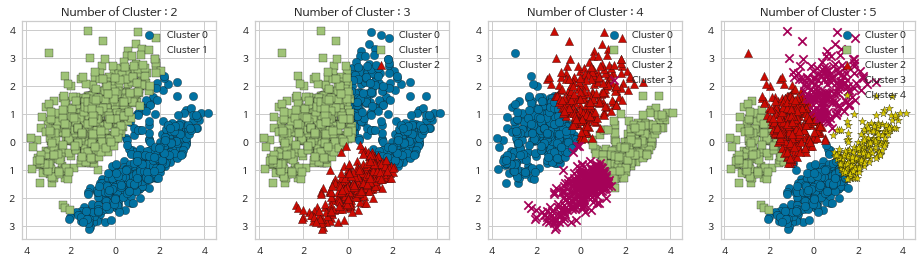

In [ ]:
visualize_silhouette([2,3,4,5],all_3_sc)
visualize_kmeans_plot_multi([2,3,4,5],all_3_sc)

### 군집 결과 칼럼별 시각화

In [ ]:
def group_plot(df, g, name_list):

  fig, axes = plt.subplots(g,len(name_list),figsize=(50, 10))
  plt.subplots_adjust(wspace=0.3, hspace = 0.5)

  for i in range(g):
    for num in range(len(name_list)):

      if num != len(name_list)-1 :
        plot1 = sns.countplot(x=name_list[num], data=df.loc[df['cluster'] == i], order = df.loc[df['cluster'] == i][name_list[num]].value_counts().iloc[:5].index[::-1], ax=axes[i, num]) 
        plot1.set_title(f'군집 : {i}' + ' ' + name_list[num] ,fontsize=15 , weight='bold')
        plot1.set_xlabel(' ')
        plot1.set_ylabel(' ')

      else:
        plot1 = sns.countplot(x=name_list[num], data=df.loc[df['cluster'] == i], order = df.loc[df['cluster'] == i][name_list[num]].value_counts().iloc[:5].index[::-1], ax=axes[i, num]) 
        plot1.set_title(f'군집 : {i}' + ' ' + name_list[num] ,fontsize=15 , weight='bold')
        plot1.set_xlabel(' ')
        plot1.set_ylabel(' ')
        plot1.set(xticklabels=[])

  

  plt.show()

In [ ]:
def group_plot2(df, text, name_list):

  fig, axes = plt.subplots(1,len(name_list),figsize=(20, 5))
  plt.subplots_adjust(wspace=0.3, hspace = 0.5)

  for i in range(len(name_list)):

    plot1 = sns.barplot(x=name_list[i], y = 'cluster', data=df, orient='h', ci=None , ax=axes[i]) 
    plot1.set_title(f'{text}' + ' ' + name_list[i] + ' ' + '평균' ,fontsize=15 , weight='bold')
    plot1.set_xlabel(' ')
    plot1.set_ylabel('cluster')

  plt.show()

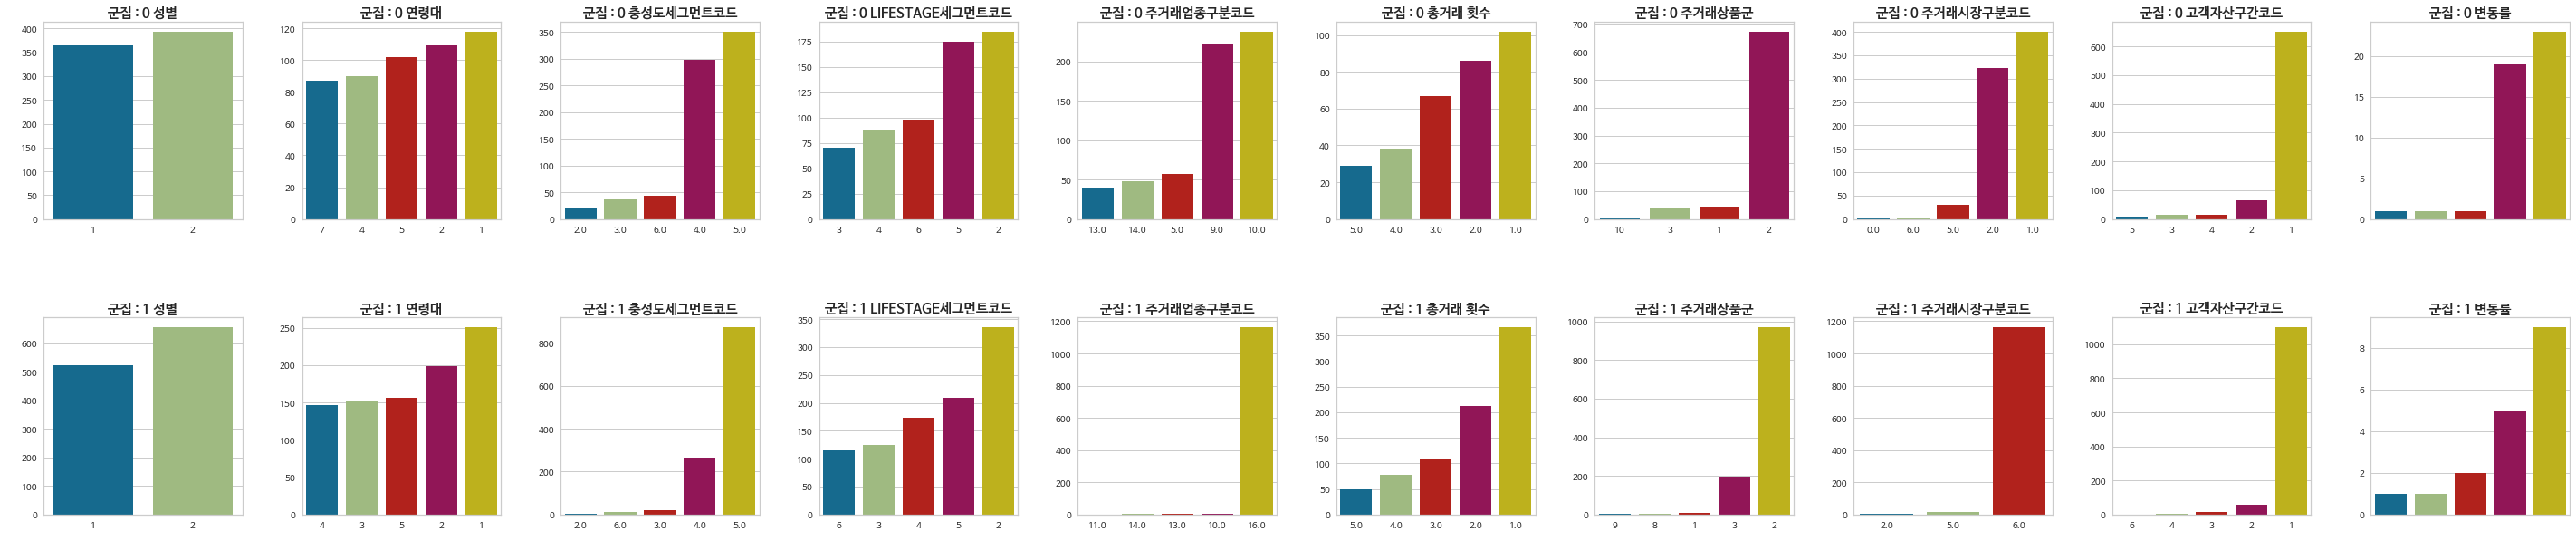

In [ ]:
name_list = ['성별', '연령대', '충성도세그먼트코드', 'LIFESTAGE세그먼트코드', '주거래업종구분코드', '총거래 횟수', '주거래상품군', '주거래시장구분코드','고객자산구간코드', '변동률']
group_plot(all_1, 2, name_list)

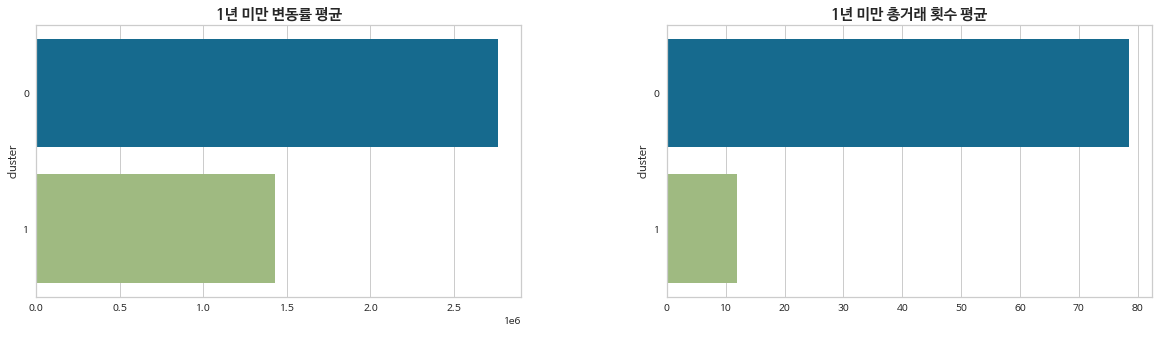

In [ ]:
name_list = ['변동률', '총거래 횟수']
group_plot2(all_1, '1년 미만',  name_list)

## 투자기간 1년 미만 고객 군집화 분석 결과
### 전반적인 고객 특성

- 연령대: 비교적 연령대가 낮다.
- 충성도세그먼트코드: 투자기간이 낮은 만큼, 충성도도 낮은 모습이다.
- LIFESTAGE세그먼트코드: 두 군집 모두 2번 사회초년생, 5번 가족성숙기_직장인의 비율이 가장 높았다.
- 총 투자횟수: 투자횟수와 고객수가 음의 상관관계를 보인다. 
- 주거래상품군: 2번 국내주식을 주로 거래하는 고객집단임을 알 수 있다. 
- 고객자산구간코드: 두 군집 모두 1000만원 미만의 자산을 갖고 있는 고객의 수가 대다수임을 알 수 있다.
---
### 군집 0
- 성별: 남녀 비율이 거의 동일하다.
- 주거래업종코드: 9 전기/전자, 10 제조의 비율이 압도적으로 높다. 
- 주거래시장구분코드: 1번 거래소, 2번 코스닥의 비율이 상당히 높다.
- 군집 1과 비교했을 때, 변동률 평균은 약 2배, 총 거래횟수는 7배 가까이 됨을 알 수 있다.
---
### 군집 1
- 성별: 여성의 비율이 남성의 비율보다 조금 더 높다.
- 주거래업종구분코드, 주거래시장구분코드: 군집 1번의 경우, 두 변수 모두 비매매의 비율이 압도적으로 높다.
---
### 해석
- 군집 0의 총 거래횟수가 군집 1의 7배 가까이 되고, 변동률 평균이 2배 가까이 되며, 군집 1의 주거래업종구분코드, 주거래시장구분코드가 대부분 비매매인걸로 보아, 해당 집단의 군집화에 거래횟수, 변동률 평균, 비매매 여부가 큰 영향을 준 것으로 보인다. 따라서 고객 타겟팅 시, 군집 0에 더 집중할 필요가 있다. 또한 군집 0의 주거래업종코드 중 9 전기/전자, 10 제조가 대부분이고, 군집 0, 1의 80%이상이 국내주식을 주로 거래하기 때문에, 투자종목을 추천할 때 이 부분에 집중하여 추천을 해준다면 고객 만족도를 높일 수 있을 것이다. 또한 해당 집단은 

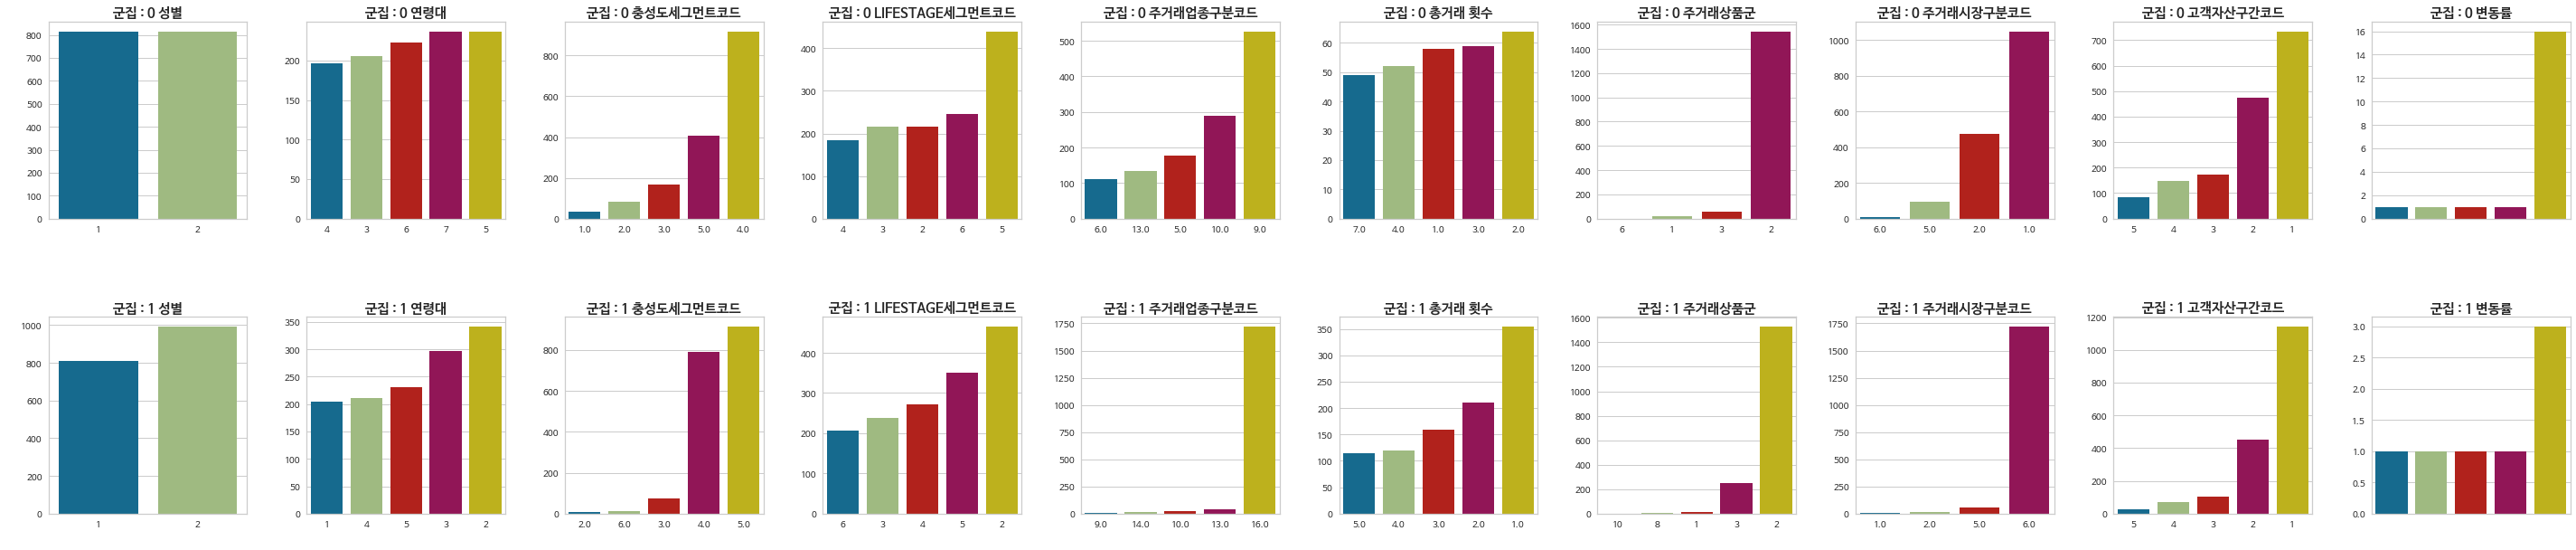

In [ ]:
name_list = ['성별', '연령대', '충성도세그먼트코드', 'LIFESTAGE세그먼트코드', '주거래업종구분코드', '총거래 횟수', '주거래상품군', '주거래시장구분코드','고객자산구간코드', '변동률']
group_plot(all_2, 2, name_list)

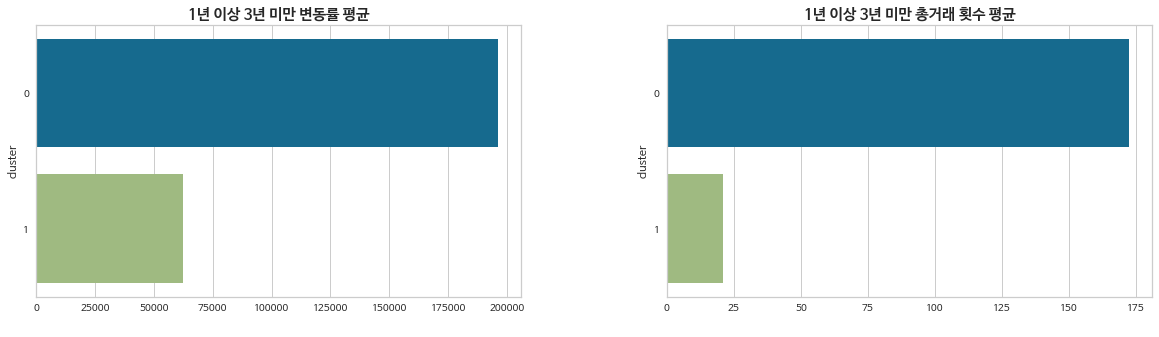

In [ ]:
name_list = ['변동률', '총거래 횟수']
group_plot2(all_2, '1년 이상 3년 미만',  name_list)

## 투자기간 1년 이상 3년 미만 고객 군집화 분석 결과
### 전반적인 고객 특성
- 충성도세그먼트코드: 두 군집 모두 충성도 하/최하가 대부분이다.
- 주거래시장구분코드: 두 군집 모두 고객의 주거래상품은 국내주식이다. 
- 고객자산구분코드: 두 군집의 고객 총자산은 비슷한 편이다.
- 총 거래 횟수: 총 거래 횟수가 군집 0이 평균 175회 정도로 많고 군집 1은 평균 20회 정도로 적다.


---


### 군집 0
- 연령대, Lifestage세그먼트코드: 30~50대가 주로 분포하며 가족성숙기의 직장인이 많이 존재한다.
- 충성도: 충성도가 높은 고객(최상/상/중)이 간간히 존재한다.
- 주거래업종구분코드: 주거래 업종은 전기/전자가 가장 많고 제조업, 서비스/오락/문화, IT, 운송/운수업 순이다.
- 주거래시장구분코드: 거래소와 코스닥을 주로 이용한다.
- 변동률: 변동률이 군집1의 약 3배로 상대적으로 큰 변동률을 보인다.
---


### 군집 1
- 성별, 연령대, Lifestage세그먼트 코드: 여성이 약 200명정도 더 많으며, 25~35세가 많이 분포하고 사회초년생이 가장 큰 비율을 차지한다.
- 주거래상품군: 비매매가 대부분이며, 상대적으로 주거래상품으로 해외주식이 있는 편이다.
---
### 해석
- 군집 0: 고객들의 충성도가 비교적 높고 거래 횟수가 많으므로 국내 주식의 주거래 업종 관련 상품을 활발하게 추천해줄 수 있는 시스템 및 편리한 인프라를 제공하면 투자기관을 유지할 가능성이 높을 것으로 보인다.
- 군집 1:거래 횟수가 많지 않은 고객들이기 때문에 인기 있고 안정적인 상품부터 추천하여 투자 자체에 대한 관심을 높이는 전략이 필요할 것으로 보인다.


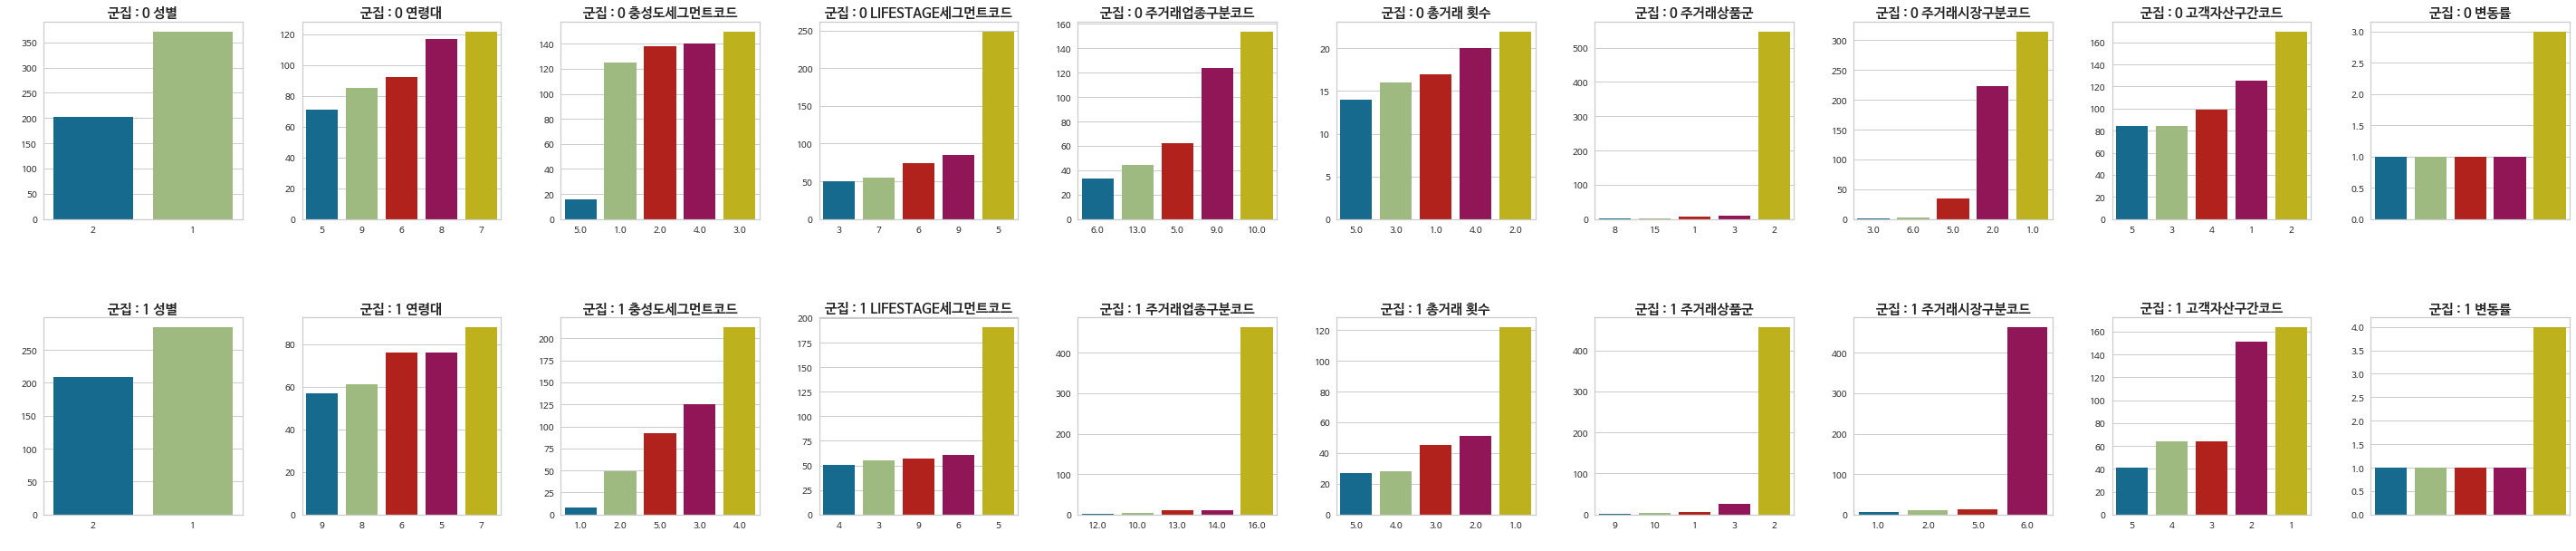

In [ ]:
name_list = ['성별', '연령대', '충성도세그먼트코드', 'LIFESTAGE세그먼트코드', '주거래업종구분코드', '총거래 횟수', '주거래상품군', '주거래시장구분코드','고객자산구간코드', '변동률']
group_plot(all_3, 2, name_list)

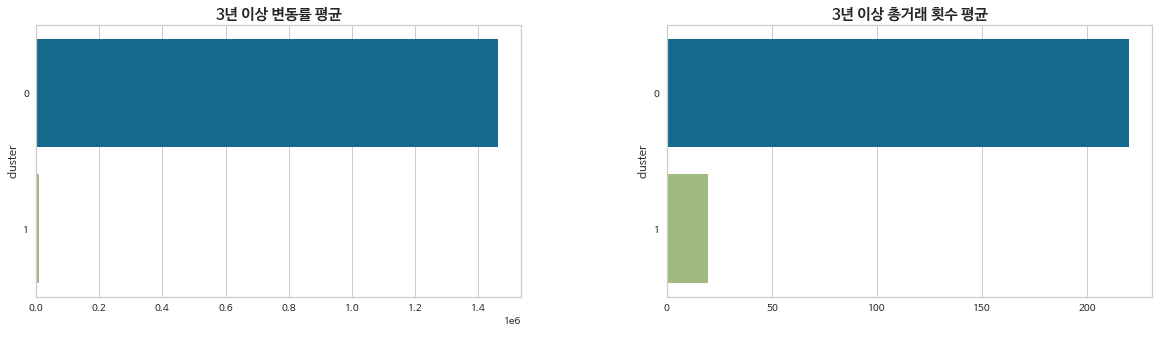

In [ ]:
name_list = ['변동률', '총거래 횟수']
group_plot2(all_3, '3년 이상',  name_list)

## 투자기간 3년 이상 고객 군집화 분석 결과

###전반적인 고객 특성
- 투자기간이 3년 이상인 고객들은 정착이 된 고객들이므로,
이 고객들의 특성을 분석해 장기 이용 고객들의 특성을 파악할 수 있다.
- Lifestage세그먼트코드, 변동률, 총 거래 횟수: 두 군집 모두 직장인이 대부분이고, 변동률과 거래 횟수 차이가 매우 확연하다.

---
### 군집 0
- 변동률, 총 거래 횟수: 변동률이 크고, 거래 횟수가 많다. 
- 고객자산구간코드, 충성도세그먼트코드: 자산구간이 높은 고객들이 상대적으로 많고, 충성도 높은 고객이 많이 분포해 있다.

---
### 군집 1
- 변동률, 총 거래 횟수: 군집 0에 비해 변동률이 작고, 거래 횟수가 적다.
- 변동률과 거래 횟수를 제외하면 군집 0과 큰 차이를 보이지 않는다.

---
### 해석
- 0번 군집은 서비스를 오래 이용하고 많이 이용하는 충성도 높은 고객들이므로,
0번 군집 고객 대상 조사를 통해 서비스의 지속적인 문제점이나 개선점을 알아낼 수 있을 것이다.

- 저장

In [ ]:
all_1.to_csv('./서성서성_투자기간1년미만고객군.csv', encoding="utf-8")
all_2.to_csv('./서성서성_투자기간1년이상3년미만고객군.csv', encoding="utf-8")
all_3.to_csv('./서성서성_투자기간3년이상고객군.csv', encoding="utf-8")